## 목차
1. [분류와 회귀](#분류와-회귀)  
    1.1. [분류](#분류)  
    1.2. [회귀](#회귀)  
2. [분류 평가지표](#분류-평가지표)  
    2.1. [오차 행렬(confusion matrix)](#오차-행렬confusion-matrix)  
    2.2. [로그 손실](#로그-손실)  
    2.3. [ROC 곡선과 AUC](#ROC-곡선과-AUC)  
3. [데이터 인코딩](#데이터-인코딩)  
    3.1. [레이블 인코딩](#레이블-인코딩)  
    3.2. [오디널 인코딩](#오디널-인코딩)  
    3.3. [원핫 인코딩](#원핫-인코딩)  
4. [피쳐 스케일링](#피쳐-스케일링)  
    4.1. [min-max 정규화(normalization)](#min-max-정규화normalization)  
    4.2. [표준화(standardization)](#표준화standardization)  
5. [교차 검증](#교차-검증)  
    5.1. [K 폴드 교차 검증](#K-폴드-교차-검증)  
    5.2. [층화 K 폴드 교차 검증](#층화-K-폴드-교차-검증)  
6. [주요 머신러닝 모델](#주요-머신러닝-모델)  
    6.1. [선형 회귀 모델](#선형-회귀-모델)  
    6.2. [로지스틱 회귀 모델](#로지스틱-회귀-모델)  
    6.3. [결정 트리](#결정-트리)  
    6.4. [앙상블 학습](#앙상블-학습)  
    6.5. [랜덤 포레스트](#랜덤-포레스트)  
    6.6. [XGBoost](#XGBoost)  
    6.7. [LightGBM](#LightGBM)  
7. [하이퍼 파라미터 최적화](#하이퍼-파라미터-최적화)  
    7.1. [그리드서치](#그리드서치)  
    7.2. [랜덤서치](#랜덤서치)  
    7.3. [베이지안 최적화](#베이지안-최적화) 

<a name="분류와-회귀"></a>
# 분류와 회귀

캐글 경진대회는 대부분 분류나 회귀 문제를 다룬다. 타깃값이 범주형 데이터면 분류문제, 수치형이면 회귀 문제이다.

<a name="분류"></a>
## 분류
책의 내용을 피처, IT 도서을 타깃을 비유함. 책을 분류하는 방법에 대한 설명

### 5.1.1 분류
이진 분류(binary clasification) : 타깃값이 2개인 분류
다중 분류(multicalss classification) : 타깃값이 3개 이상인 분류

### 5.1.2 회귀
독립변수(independent variable) : 영향을 미치는 변수
종속변수(dependent variable) : 영향을 받는 변수
회귀란 독립변수와 종속변수 간 관계를 모델링하는 방법이다.

선형회귀(simple linear regression) : y = ax + b
다중 선형회귀(multiple linear regression) : y = ax + by + c

### 자주 사용하는 회귀 평가지표
- MAE : 평균절대오차
- MSE : 평균제곱오차
- RMSE : 평균제곱근 오차
- MSLE : Mean Squared Log Error
- RMSLE : Root Mean Squared Log Error
- R^2 : 결정계수

RMSE vs. RMSLE
1. 아웃라이어에 강건하다. : 이상치 또는 아웃라이어가 있더라도 값의 변동폭이 크지 않다.
2. 상대적 Error 측정 : 상대적 및 절대적 차이에 의해 RMSE는 변화하지만, RMSLE은 예측값과 실제값의 상대적 error를 측정한다.
 - 단, RMSLE의 한계는 예시로 돈 관련 문제에 적용할 때 1억과 100억의 오차와 1원과 100원의 오차 의미가 퇴색하게 된다.
3. Under Estimation에 큰 패널티를 부여한다.
 - RMSLE는 over estimation보다 under estimation에 더 큰 패널티를 부여한다. 즉, 예측값이 실제보다 작을 때 더 큰 패널티를 부여한다.  
 - 예를 배달에서 30분이 걸린다고 했는데 20분이 걸리는건 문제가 없지만, 20분이 걸린다고 했는데 30분이 걸린다면 문제가 있다고 볼 수 있다.  

|평가지표|수식|설명|
|--|--|--|
|MAE|$${1 \over N} \sum_{i=1}^N\|y_i - \hat{y_i}\|$$||
|MSE|$${1 \over N} \sum_{i=1}^N(y_i - \hat{y_i})^2$$||
|RMSE|$$\sqrt{{1 \over N} \sum_{i=1}^N(y_i - \hat{y_i})^2}$$||
|MSLE|$${1 \over N} \sum_{i=1}^N(log(y_i+1)-log(\hat{y_i}+1))^2$$|$$-\infty$$를 방지하기 위하여 log에 +1을 취함|
|RMSLE|$$\sqrt{{1 \over N} \sum_{i=1}^N(log(y_i+1)-log(\hat{y_i}+1))^2}$$|$$-\infty$$를 방지하기 위하여 log에 +1을 취함|
|$$R^2$$|$$ \hat{\sigma}^2 \over {\sigma}^2$$|1에 근첩하는게 정확도가 높음|  


<a name="회귀"></a>
## 회귀

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1,2,3,4,5,7,8,6,4,4,3])
pred = np.array([1,2,3,4,5,7,2,6,4,7,3])

MAE = mean_absolute_error(true, pred)
MSE = mean_squared_error(true, pred)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, pred)
RMSLE = np.sqrt(MSLE)
R2 = r2_score(true, pred)

print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')

MAE:	 0.8182
MSE:	 4.0909
RMSE:	 2.0226
MSLE:	 0.1298
RMSLE:	 0.3603
R2:	 -0.0185


<a name="분류-평가지표"></a>
# 분류 평가지표

<a name="오차-행렬confusion-matrix"></a>
## 오차 행렬(confusion matrix)

<table>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td>predict</td>
    </tr>
    <tr>
      <td></td>
      <td></td>
      <td>positive</td>
      <td>negative</td>
    </tr>
    <tr>
      <td rowspan="2">real</td>
      <td>positive</td>
      <td>TP</td>
      <td>FN</td>
    </tr>
    <tr>
      <td>negative</td>
      <td>FP</td>
      <td>TN</td>
    </tr>
  </tbody>
</table>

참 양성(True Positive, TP) : 양성으로 정답을 맞춘 경우  
참 음성(True Negative, TN) : 음성으로 정답을 맞춘 경우  
거짓 양성(False Positive, FP) : 양성으로 못 맞춘 경우  
거짓 음성(False Negative, TN) : 음성으로 못 맞춘 경우  

오차 행렬을 활용한 지표는 정확도, 정밀도, 재현율, F1 점수가 있다.  

* 정확도(accuracy) : 정확도는 잘 쓰이지 않는다.  
전체에서 True가 차지하는 비율  
(*모델의 우수성을 따질때 잘 사용하지 않음)  
$${TP+TN}\over{TP+TN+FP+FN}$$

* 정밀도(precision) : 정밀도는 음성을 양성으로 잘못 판단하면 문제가 발생하는 경우에 사용한다. 검출하기 원하는 상태를 보통 양성으로 정한다. 즉, 문제가 되는 상태를 양성, 정상인 상태를 음성이라고 본다.  
Positive predict중의 True가 차지하는 비율  
(*실제 negative가 positive로 측정되는것이 critical할때 사용)  
$${TP}\over{TP+FP}$$

* 재현율(recall)(TPR) : 양성을 음성으로 잘못 판단하면 준제가 되는 경우에 사용한다.(예, 암진단)
positive real중의 True가 차지하는 비율  
(*실제 positive가 negative로 측정되는것이 critical할때 사용)  
$${TP}\over{TP+FN}$$

* F1 점수(F1 score)  
정밀도와 재현율의 조화평균으로 편중되지않은 균등한 모델을 만들때 사용  
$${2}\over{{{1} \over {precision}}+{{1} \over {recall}}}$$

<br/>


<a name="로그-손실"></a>
## 로그 손실

타겟을 확률적으로 예측시 사용되는 모델(0에 가까울 수록 좋음)  
$$logloss = -{{1}\over{N}}\sum_{i=1}^N(y_ilog(\hat{y_i})+(1-y_i)log(1-\hat{y_i}))$$

<a name="ROC-곡선과-AUC"></a>
## ROC 곡선과 AUC
- ROC(Receiver Operating Characteristic)곡선은 참 양성 비율(TPR)에 대한 거짓 양성 비율(FPR)곡선이다.  
- AUC(Area Under the Curve)는 ROC 곡선 아래 면적을 의미한다.  

로그손실과 같이 예측값이 확률일때 사용하게 된다.  
$$TNR = {{TN}\over{FP+TN}}$$
$$FPR = 1 - TNR$$  

TNR은 특이도(specificity)라고도 불린다.
<center>
  <img
    src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Roc_curve.svg/512px-Roc_curve.svg.png"
    width="350"
    height="400"
  />
</center>

<br/><br/>

<a name="데이터-인코딩"></a>
# 데이터 인코딩

대표적인 데이터 인코딩에서는 **레이블 인코딩**과 **원-핫 인코딩**이 있다.  

<a name="레이블-인코딩"></a>
## 레이블 인코딩  

레이블 인코딩을 적용하면 원본 데이터의 값에 사전순으로 번호를 매깁니다.  

In [2]:
from sklearn.preprocessing import LabelEncoder

fruits = ['banana', 'berry', 'blueberry']

label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터:', fruits_label_encoded)

레이블 인코딩 적용 후 데이터: [0 1 2]


<a name="오디널-인코딩"></a>
## 오디널 인코딩  
범주형 데이터를 숫자로 1대1 매칭해주는 방법(고차원 데이터)  
데이터간의 상관관계가 있을 때 사용  

<a name="원핫-인코딩"></a>
## 원핫 인코딩  
범주형 데이터 value수 만큼 feature를 늘려서 해당하면 1 아니면 0을 나타냄  
메모리를 아끼기 위해서 Compressed spares row로 변환됨  
데이터간의 상관관계가 없을 때 사용  

In [12]:
from sklearn.preprocessing import OneHotEncoder

fruits = ['banana', 'berry', 'blueberry']

# 레이블 인코더, 원-핫 인코더 생성
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

# 레이블 인코딩 적용(문자 데이터 -> 숫자 데이터)
fruits_onehot_encoded = label_encoder.fit_transform(fruits)

# 원-핫 인코딩 적용
# reshape의 -1 값은 다른 인자 값에 따라 의존적으로 변화는 값을 의미한다.  
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1,1))

print('원-핫 인코딩 적용 후 데이터: \n', fruits_onehot_encoded.toarray())

# -----------------------------------

원-핫 인코딩 적용 후 데이터: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [13]:
import pandas as pd
pd.get_dummies(fruits)

,banana,berry,blueberry
0,True,False,False
1,False,True,False
2,False,False,True


<a name="피쳐-스케일링"></a>
# 피쳐 스케일링  

피쳐들마다 범위가 다르기때문에 범위를 조절하는 기법  
단, 트리 기반 모델(랜덤 포레시트, XGBoost, LightGBM 등)은 피처 스케일링이 필요 없다.  
트리 기반 모델은 데이터의 크기보다는 대소 관계에 영향을 받기 때문이다. 피처 스케일링을 하더라도 데이터의 대소 관계에는 변함이 없다.  

<a name="min-max-정규화normalization"></a>
## min-max 정규화(normalization)  

0~1의 범위의 값으로 수치를 변화시키는것을 의미하며 아래의 식으로 변환됨  
(outlier에 취약함)  
$$x_{scaled} = {{x-x_{min}} \over {x_{max}-x_{min}}}$$
fit, transform을 따로 할때 음수 발현가능

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

scaler = MinMaxScaler()
scaler.fit(df) # df 데이터에서 min max를 사용하여 동작
df_scaled = scaler.transform(df) # 여기서는 예시로 df를 했지만 다른 데이터를 입력하면 앞에서 사용한 min max를 적용하는 부분
# 예시
# df_scaled2 = scaler.transform(df2)
# df_scaled3 = scaler.transform(df3)

print(df)
print(df_scaled)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60
[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


<a name="표준화standardization"></a>
## 표준화(standardization)  

평균이 0, 분산이 1이 되게 피쳐를 조정(정규분포를 따르는 데이터는 표준화 스케일링을 적용하는게 좋다.)
$$x_{scaled} = {{x-\hat{x}}\over{\sigma}}$$

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

print(df)
print(df_scaled)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60
[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


<a name="교차-검증"></a>
# 교차 검증  

성능검증의 필요성  
1. 과적합 : 모델 과적합을 피할 수 있다.
2. 캐글에서 제출하기 전까지 성능을 확인하기 어렵다.

위의 2가지를 위해서 교차 검증을 사용한다. 가장 일반적인 방법이 K 폴드 교차 검증이다. 

<a name="K-폴드-교차-검증"></a>
## K 폴드 교차 검증  
1. 전체 훈련 데이터를 K개 그룹으로 나눈다.  
2. 그룹 하는 검증 데이터로, 나머지 K-1개는 훈련 데이터로 지정한다.  
3. 훈련 데이터로 모델을 훈련하고, 검증 데이터로 평가한다.  
4. 평가점수를 기록한다.  
5. 검증 데이터를 다른 그룹으로 바꿔가며 2~4 절차를 K번 반복한다.  
6. K개 검증 평가점수의 평균을 구한다.  

In [1]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0,1,2,3,4,5,6,7,8,9])

folds = KFold(n_splits=5, shuffle=True)

for train, valid in folds.split(data):
    print(train, valid)

[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 4 5 6 9] [7 8]
[0 1 3 4 6 7 8 9] [2 5]
[0 2 3 5 6 7 8 9] [1 4]
[1 2 3 4 5 7 8 9] [0 6]


<a name="층화-K-폴드-교차-검증"></a>
## 층화 K 폴드 교차 검증  
층화 K 폴드 교차 검증은 타깃값이 폴드마다 골고루 분포되게 나누는 방법이다. 
> 주위! 층화 K 폴드 교차 검증은 **분류 분제**에서만 쓰인다.
> (저자 주) 근듕한 비율로 나누기 위해서는 타깃값이 유한해야 하다고 한다. 즉, 연속된 값이면 동일한 비율이 안된다는 뜻임.  

In [15]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Flod {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], "\n")

Flod 1 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 3 검증 데이터 타깃값:
['스팸' '스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 4 검증 데이터 타깃값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



In [11]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

X = np.array(range(0,100,2))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5, shuffle=True)

for idx, (train_idx, valid_idx) in enumerate(folds.split(X,y)):
    print(f'Flod {idx+1} 검증 데이터 타깃값:')
    print(y[valid_idx], "\n")

Flod 1 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 2 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 3 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 4 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Flod 5 검증 데이터 타깃값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



<a name="주요-머신러닝-모델"></a>
# 주요 머신러닝 모델

+ 선형회귀
+ 랜덤 포레스트
+ 로지스틱 회귀
+ XGBoost
+ 결정 트리
+ LightGBM
+ 앙상블 학습

<a name="선형-회귀-모델"></a>
## 선형 회귀 모델

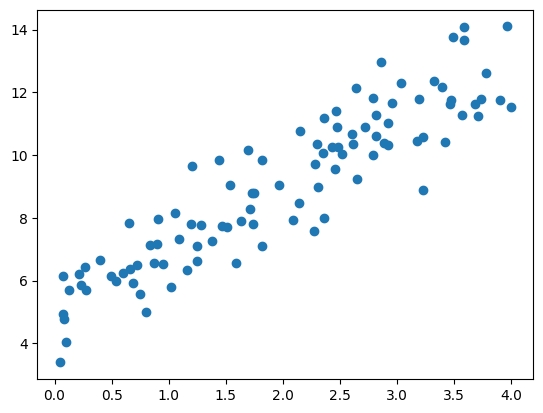

In [19]:
# y = 2x + 5에 근사하는 데이터 100개에 대한 선형 회귀 모델
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # 시드 값 고정

w0 = 5 # y 절편
w1 = 2 # 회귀계수
noise = np.random.randn(100, 1) # 노이즈

x = 4* np.random.rand(100, 1) # 0~4 사이 실수값 100개 생성 (x값)
y = w1*x+w0+noise # y값
plt.scatter(x,y)
plt.show()

In [21]:
# 모델 훈련
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x,y)

print('w0 : ', linear_reg_model.intercept_)
print('w1 : ', linear_reg_model.coef_)

w0 :  [5.09772262]
w1 :  [[1.9808382]]


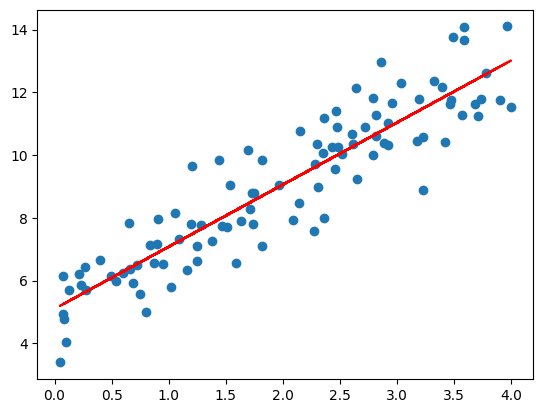

In [25]:
# 회귀선 그리기
y_pred = linear_reg_model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color = 'red')
plt.show()

<a name="로지스틱-회귀-모델"></a>
## 로지스틱 회귀 모델  
이진 분류 문제에 사용되는 로지스틱 회귀 모델이다. $x$가 변할 때 $y$가 1이 되는 경향성을 판별하는 모델이다.  
* odds  
성공확률과 실패 확률의 비율  

$$odds = \tfrac{p(y=1|x)}{1-p(y=1|x)}$$

* logit  
odds에 log를 취한 함수  

$$logit(p) = log(\tfrac{p}{1-p})$$

* sigmoid function  
logit 함수의 입력과 출력을 바꾼함수  

$$p(X) = \tfrac{1}{1+e^{-\beta X}}$$

* logistic function  
sigmoid 함수 만들어진 예측 모델  

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df["label"] = breast_cancer.target
print(df)

from sklearn.model_selection import train_test_split

# Step1) train / test 으로 나누기
train, test = train_test_split(df, test_size=0.2, random_state=0)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [27]:
from sklearn.metrics import accuracy_score

# 모델 만들기
majority_class = train["label"].mode()[0]

# 기준모델의 정확도 계산을 위한 데이터 생성
y_pred = [majority_class] * len(test)

# validation 데이터셋에 대한 정확도 확인
print("최빈 클래스: ", majority_class)
print("validation 데이터셋 정확도: ", accuracy_score(test["label"], y_pred))

최빈 클래스:  1
validation 데이터셋 정확도:  0.5877192982456141


In [28]:
from sklearn.linear_model import LogisticRegression

y_train = train['label']
X_train = train.drop(columns='label')
y_test = test['label']
X_test = test.drop(columns='label')

# 모델 생성 및 학습 시키기
logistic = LogisticRegression(max_iter=5000) # iter 초과시 증가
logistic.fit(X_train, y_train)

# 결과 확인
print("validation 데이터셋 정확도", logistic.score(X_test, y_test))
print("validation 데이터셋의 타겟 확률", logistic.predict_proba(X_test))

validation 데이터셋 정확도 0.9473684210526315
validation 데이터셋의 타겟 확률 [[9.94248604e-01 5.75139604e-03]
 [3.09609046e-02 9.69039095e-01]
 [1.34983722e-03 9.98650163e-01]
 [1.42638641e-01 8.57361359e-01]
 [3.01743109e-05 9.99969826e-01]
 [6.16150187e-04 9.99383850e-01]
 [2.71063677e-03 9.97289363e-01]
 [5.05695474e-04 9.99494305e-01]
 [7.32929302e-05 9.99926707e-01]
 [1.31420997e-05 9.99986858e-01]
 [7.05623977e-01 2.94376023e-01]
 [1.92600564e-01 8.07399436e-01]
 [7.28368281e-05 9.99927163e-01]
 [7.37911102e-01 2.62088898e-01]
 [3.21821170e-01 6.78178830e-01]
 [9.90741602e-01 9.25839829e-03]
 [3.82129316e-04 9.99617871e-01]
 [9.99999817e-01 1.82887194e-07]
 [9.95867001e-01 4.13299923e-03]
 [1.00000000e+00 4.08608413e-10]
 [9.99904176e-01 9.58240211e-05]
 [9.65495511e-01 3.45044892e-02]
 [2.00717945e-03 9.97992821e-01]
 [3.67701533e-03 9.96322985e-01]
 [8.67353069e-01 1.32646931e-01]
 [3.82444937e-03 9.96175551e-01]
 [1.93714824e-04 9.99806285e-01]
 [9.26213090e-01 7.37869101e-02]
 [2.02390512e-

<a name="결정-트리"></a>
## 결정 트리

1. 데이터를 가장 잘 구분하는 조건을 선정  
2. 조건을 기준으로 데이터를 두 범주로 분류  
3. 나뉜 각 범주의 데이터를 잘 구분하는 조건을 다시 결정  
4. 조건에 따라 각 범주에 속한 데이터를 다시 분할
5. 위와 같은 순서로 계속 분할해 최종 결과 값을 도출  

> 머신러닝에서 결정트리(decision tree)를 분할하는 방법은 불순도(impurity)를 최소화하는 방향으로 분할한다.  
1. 엔트로피 : 0~1, 0에 가까울수록 불순도가 낮아진다.  
2. 지니 불순도  : 0~1  

* criterion : 불순도 측정 지표 [default : 'gini', 'entropy']
* max_depth : 트리 최대 깊이 [default : None]
    * min_samples_split과 같은 옵션이 없으면 기본으로 불순도 0까지 분할
* min_samples_split : 노드 분할에 필요한 최소 데이터수 [default : 2]
    * 정수형, 실수형(비율) 사용가능
* min_samples_leaf : 말단 노드가 되기 위한 최소 데이터수 [default : 1]
    * 정수형, 실수형(비율) 사용가능
* max_features : 분할에 사용할 피쳐수 [default : None]
    * 정수형, 실수형(비율) 사용가능
    * 'auto', 'sqrt', 'log2' 사용가능

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'],
                                breast_cancer['target'],
                                stratify=breast_cancer['target'],
                                test_size=0.2,
                                random_state=0
                                )
                    
decisiontree = DecisionTreeClassifier(random_state=0)
decisiontree.fit(X_train, y_train)

accuracy = decisiontree.score(X_test, y_test)

print(f'결정 트리 정확도 : {accuracy:.3f}')

결정 트리 정확도 : 0.939


<a name="앙상블-학습"></a>
## 앙상블 학습  

다양한 모델에서 나온 결과를 복합적으로 사용하여 성능을 향상하는 기법

### 보팅(voting)
* 하드 보팅(hard voting)  
실행한 모델들에서 나온 결과에서 다수결 투표를 진행
* 소프트 보팅(soft voting)  
실행한 모델들에서 나온 확률의 평균값으로 진행

### 배깅(bagging)  
서로 다른 샘플링 데이터를 활용하여 앙상블 모델을 구축  
1. 전체 훈련 데이터셋에서 무작위 샘플링한 데이터로 개별 모델을 훈련  
2. 훈련된 개별 모델로 결과를 예측  
3. 개별 모델의 수만큼 1~2번 작업을 반복  
4. 각 모델이 예측한 값들을 보팅하여 최종 예측값을 산출  

### 부스팅(Boosting)  
가중치를 활용해 분류 성능이 낮은 모델을 높게 만드는 기법이다.  
예를 들어, 이전 모델이 잘못 예측한 데이터에 대해 가중치를 적용해 다음 모델이 가중치가 적용된 데이터를 좀 더 고려하면서 학습할 수 있도록 유도한다.  

> 부스팅 기법을 활용한 대표적인 모델은 XGBoost와 LightGBM 등이 있다.  


In [30]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#load dataset
cancer_dataset = load_breast_cancer()

# cancer_dataset 그냥 찍어보니 이상하게 나옴.. dataframe화 해줘야 헸음. 
cancer_dataset_df = pd.DataFrame(cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer_dataset_df.head()


# dataset split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset.data, cancer_dataset.target, test_size=0.2, random_state=121)


#weak learners: logistic regression, KNN
logistic_regression = LogisticRegression()
KNN = KNeighborsClassifier()

#votinng ensemble with these two weak learners
voting_ensemble = VotingClassifier(estimators=[("LogisticRegression", logistic_regression), ("KNN", KNN)],
                                  voting = 'soft')


# voting_ensemble model train/val/test
voting_ensemble.fit(X_train, y_train)
y_pred = voting_ensemble.predict(X_test)

print("voting 분류기 정확도 {0:.4f}".format(accuracy_score(y_test, y_pred)))

d:\Dev_folder\anaconda3\envs\recent\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


voting 분류기 정확도 0.9649


<a name="랜덤-포레스트"></a>
## 랜덤 포레스트  
랜덤 포레스트는 결정 트리에 배깅 방식으로 결합한 모델을 말한다.  
파라미터는 decision tree에서 n_estimators(트리의 수)만 추가되었다.

* n_estimators : 랜덤 포레스트에 사용될 트리의 수  [default : 100]
* criterion : 불순도 측정 지표 [default : 'gini', 'entropy']
* max_depth : 트리 최대 깊이 [default : None]
    * min_samples_split과 같은 옵션이 없으면 기본으로 불순도 0까지 분할
* min_samples_split : 노드 분할에 필요한 최소 데이터수 [default : 2]
    * 정수형, 실수형(비율) 사용가능
* min_samples_leaf : 말단 노드가 되기 위한 최소 데이터수 [default : 1]
    * 정수형, 실수형(비율) 사용가능
* max_features : 분할에 사용할 피쳐수 [default : None]
    * 정수형, 실수형(비율) 사용가능
    * 'auto', 'sqrt', 'log2' 사용가능

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'],
                                breast_cancer['target'],
                                stratify=breast_cancer['target'],
                                test_size=0.2,
                                random_state=0
                                )
                    
decisiontree = RandomForestClassifier(random_state=0)
decisiontree.fit(X_train, y_train)

accuracy = decisiontree.score(X_test, y_test)

print(f'결정 트리 정확도 : {accuracy:.3f}')



결정 트리 정확도 : 0.947


<a name="XGBoost"></a>
## XGBoost
성능이 우수한 **트리 기반 부스팅 알고리즘**이다.  

파이썬 래퍼 XGBoot를 사용할려면 DMatrix 객체를 활용해 XGBoost 전용 데이터셋을 만들어야 한다.  
xgboost.DMatrix() 파라미터는 다음과 같다.   
- data : xgboost.DMatrix용 데이터셋  
    - 넘파일 배열, 판다스 DataFrame, scpiy.spares, os.PathLike, 문자열 타입을 전달할 수 있다.(o.sPahtLike나 문자열이면 데이터 파일 경로를 의미함)  
- label : 타깃값  
    - 배열 타입을 전달할 수 있음  

for XGBoost() class
* booster : 부스팅 알고리즘 [default : 'gbtree', 'dart', 'gblinear']
    * gblinear : 선형 모델(성능 하)
    * dart : 드롭아웃 적용한 gbtree
* objective : 훈련 목적 [default : 'reg:squarederror']
    * 회귀에서 'reg:squarederror'
    * 확룰성 이진분류에서 'binary:logistic'
    * softmax 사용 다중분류에서 'multi:softmax'
    * 확률값을 구하는 다중분류에서 'multi:softprob'
* eta : 학습률(단계별 가중치) [default : 0.3, 0~1, normally 0.001~0.1]
* max_depth : 트리의 최대 깊이 [default : 6, normally 3~10]
* subsample : 개별 트리에 사용할 데이터 샘플링 비율 [default : 1, normally 0.6~1]
* colsample_bytree : 트리 훈련에 사용하는 피쳐 샘플링 비율 [default : 1, normally 0.6~1]
* alpha : L1(lasso) 규제 값 [default : 0]
* reg_lambda : L2(Ridge) 규제 값 [default : 1]
* gamma(min_split_loss) : leaf node가 분할 하기위한 최소 loss[default : 0, 0~$\infty$]
* min_child_weight : 과적합 방지 값 [default : 1, 0~$\infty$]
* scale_pos_weight : 불균형 데이터 가중치 조정 값 [default : 1]
    * 주로 $음성타깃 \over 양성타깃$ 으로 설정
    
for train() method
* params : dict type 하이퍼 파라미터 목록
* dtrain : 훈련 데이터셋
* num_boost_round : 부스팅 반복 횟수 [default : 10]
    * 성능, 과적합, 시간의 상관관계가 있음
* evals : 검증용 데이터 셋 [default : []]
* feval : 검증용 평가지표 evals사용시 활용 [default : None]
* maximize : feval이 높은게 좋은가? [True, False]
* early_stopping_rounds : 조기종료 옵션 [default : None, int]
    * eta가 크면 줄이고 작으면 키움
    * evals가 필요함
    * 옵션의 숫자만큼 반복하고 다음번으로 반복한 결과와 비교해 성능이 감소하면 종료
* verbose_eval : 성능 점수 로그 설정 [default : True, False, int]
    * 설정된 횟수만큼 반복후 성능지표를 보여줌

<a name="LightGBM"></a>
## LightGBM

for LightGBM() class
* boosting_type : 부스팅 알고리즘 [default : 'gbdt', 'dart', 'goss','rf]
    * g
* objective : 훈련 목적 [default : 'regression']
    * 회귀에서 'regression'
    * 이진분류에서 'binary'
    * 다중분류에서 'multiclass'
* learning_rate(eta) : 학습률(단계별 가중치) [default : ]
* num_leaves : leaf node 갯수 커지면 과적합 위험 [default : 31]
* max_depth : 트리의 최대 깊이 [default : -1]
* bagging_fraction(subsample) : 개별 트리에 사용할 데이터 샘플링 비율 [default : not 0]
    * g
* feature_fraction(colsample_bytree) : 트리 훈련에 사용하는 피쳐 샘플링 비율 [default : ]
    * g
* lambda_l1(reg_alpha) : L1(lasso) 규제 값 [default : 0]
* lambda_l2(reg_lambda) : L2(Ridge) 규제 값 [default : 0]
* min_child_samples : leaf node가 되기위한 최소 데이터 수 [default : 20]
* min_child_weight : 과적합 방지 값 [default : $1e^{-3}$, 0~$\infty$]
* bagging_freq : 배깅 수행 빈도 [default : 0]
    * 몇번의 iter 마다 배깅을 할지 결정
* force_row_wise : 메모리 효율 증가 [default : False, True]

for train() method
* params : dict type 하이퍼 파라미터 목록
* train_set : 훈련 데이터셋
* num_boost_round : 부스팅 반복 횟수 [default : 10]
    * 성능, 과적합, 시간의 상관관계가 있음
* valid_sets : 검증용 데이터 셋 [default : None]
* feval : 검증용 평가지표 evals사용시 활용 [default : None]
* categorical_feature : 범주형 데이터 지정옵션
* early_stopping_rounds : 조기종료 옵션 [default : None, int]
    * eta가 크면 줄이고 작으면 키움
    * evals가 필요함
    * 옵션의 숫자만큼 반복하고 다음번으로 반복한 결과와 비교해 성능이 감소하면 종료
* verbose_eval : 성능 점수 로그 설정 [default : True, False, int]
    * 설정된 횟수만큼 반복후 성능지표를 보여줌

# XGBoot와 LightGBM의 강점  

1. 피처 스케일링이 따로 필요없다. 데이터의 절대적인 크기보다는 대소 관계에 영향을 받기 때문이다.  
2. 레이블 인코딩을 적용해도 된다. 레이블 인코딩은 단점이 있다고 했지만, 트리 기반 모델의 특성상 분기르 ㄹ거릅하면서 레이블 인코딩된 피처에서도 정보를 잘 추출할 수 있기 때문이다.  
3. 결측값을 알아서 처리해준다. (그럼에도 더 명확하게 하려면 결측값을 별도로 처리하는 습관을 들이는게 바람직하다.)  
단, 선형모델은 피처 스케일링, 결측값 처리, 원-핫 인코딩을 해줘야 일반적으로 성능이 좋아진다. 

# 사이킷런 래퍼 모듈 vs. 파이썬 래퍼 모듈  
사이킷런은 XGBoost와 LightGBM을 비롯해 여러 모델을 지원한다. 다음 표에 사이킷런 패러 모듈과 파이썬 래퍼 모듈 사용범의 차이를 정리했다. 

|구분|사이킷런 래퍼 모델 | 파이썬 래퍼 모듈|
|--|--|--|
|모델 생성|모델이 워낙 많다보니 클래스 활용,<br> 예) LogisticRegression(),  XGBRegressor(),  LGBMClassifier() | 별도로 모델을 생성하지 않고, 임포트한 xgboost 혹은 lightgmb을 그대로 사용 <br> 예) import xgboost <br> import lightgbm |
|데이터셋| 별도로 데이터셋을 생성하지 않고 원본 데이터(배열, DataFrame 등의 타입)를 그대로 사용 | 별로 데이터셋을 생성 <br> XGBoot는 DMatrixi 객체 활용, LightGBM은 Dataset 객체 활용 <br> 예) xgboost.DMatrix() <bar> lightgbm.Dataset() |
|모델 훈련| 생성한 모델 객체의 fit() 메서드를 호출 | 임포트한 xgboost 혹은 lightgbm 모듈을 바로 사용해서 train() 메서드 호출|
|예측 | 생성한 모델 객체의 predict() 혹은 predict_proba() 메서드로 예측 | predict() 메서드로 예측|
|하이퍼 파라미터 입력 방식| 모델 하이퍼 파라미터는 모델 생성 시 입력하고, 훈련 하이퍼 파라미터는 fit() 메서드에 입력| 모두 train() 메서드에 입력 <br> 모델 하이퍼 파라미터는 train()의 params 파라미터에 일괄 입력|


<a name="하이퍼-파라미터-최적화"></a>
# 하이퍼 파라미터 최적화  
최적의 파라미터를 찾아가는 방법  
하이퍼 파라미터를 요리에 비유하면서 설명했다. 레시피가 있지만, 매운맛을 좋아하는 사람은 고추장을 더 넣거나 싱겁게 먹는 사람은 소금을 덜 넣거나 한다. 이와 같이 모델에서도 분석자가 입력하는 데이터의 의미를 파악하면서 하이퍼 파라미터의 최적화를 수행한다.  
대표적으로 그리드서치, 랜덤서치, 베이지안 최적화 이렇게 볼 수 있다.  

<a name="그리드서치"></a>
## 그리드서치  
모든 경우의 수를 탐색하는 방식이다. 그래서 많은 시간이 필요한게 단점이다. 

<a name="랜덤서치"></a>
## 랜덤서치(random search)  
하이퍼 파라미터를 무작위로 추출하여 최적의 파라미터를 찾아가는 방법이다. 무작위라는 한계 때문에 사용빈도가 떨어진다.  


<a name="베이지안-최적화"></a>
## 베이지안 최적화(bayesian optimization)  
`bayes_opt`라는 패키지로 베이지안 최적화를 구현  
수행 절차는 다음과 같다.  
1. 하이퍼 파라미터 탐색 범위 설정  
    ```python
    # 하이퍼 파라미터 범위(딕셔너리 형태)
    param_bounds = {'x': (-1, 5),
                    'y': (0,  4)}
    ```
2. 평가지표 계산 함수(성능 평가 함수) 정의  
    ```python
    # 예시
    def eval_function(x,y):
        return -x ** 2 - ( - 2) ** 2 + 10
    ```
3. Bayesian Optimization 객체 생성 : bayes_opt 패키지의 `BayesianOptimization` 객체를 생성한다. 객체 생성 시 **평가지표 계산 함수**와 **하이퍼 파라미터 탐색 범위**를 전달 받는다.  
    ```python
    from bayes_opt import BayesianOptimization
    # 베이지안 최적화 객체 생성
    optimizer = BayesianOptimization(f=eval_function,
                                       pbounds=param_bounds,
                                       random_state=0)
    ```
4. 베이지안 최적화 수행 : 3번에서 생성한 BayesinOptimization 객체의 maximize() 메서드를 호출한다. 하이퍼 파라미터 범위 내에서 평가 지표를 계산한 평가 지표가 가장 좋은 하이퍼 파라미터를 최적이라고 판단한다.  
    * init_points : 랜덤 탐색의 스텝 횟수
    * n_iter : 베이지안 실행 횟수  
    ```python
        optimizer.maximize(init_points=2, n_iter=10)
    ```

In [ ]:
import xgboost as xgb

param_bounds = {'max_depth': (4, 8),
'subsample': (0.6, 0.9),
'colsample_bytree': (0.7, 1.0),
'min_child_weight': (5, 7),
'gamma': (8, 11),
'reg_alpha': (7, 9),
'reg_lambda': (1.1, 1.5)}


from sklearn.metrics import roc_auc_score

def eval_function(max_depth, subsample, colsample_bytree, min_child_weight, gamma, reg_alpha, reg_lambda):
  param_bounds = {'max_depth': max_depth,
                  'subsample': subsample,
                  'colsample_bytree': colsample_bytree,
                  'min_child_weight': min_child_weight,
                  'gamma': gamma,
                  'reg_alpha': reg_alpha,
                  'reg_lambda': reg_lambda}
  xgb_model = xgb.train(params=params, dtrain=train, num_boost_round=2000, evals=[(valid, 'valid')], maximize=True, early_stopping_round=200)
  best_iter = xgb_model.best_iteration
  preds = xgb_model.predict(valid, iteration_range=(0, best_iter))
  score = roc_auc_score(y_valid, preds)

  return score

from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function, pbounds=param_bounds)

optimizer.maximize(init_points=3, n_iter=10)

max_params = optimzier.max['params']